In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
sns.set()
sns.color_palette('Paired')
sns.set_palette('viridis')
plt.style.use('ggplot')

In [ ]:
df=pd.read_csv(r'C:\Users\dorot\Downloads\introvert\personality_synthetic_dataset.csv')
df.head()

,personality_type,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,organization,leadership,risk_taking,public_speaking_comfort,curiosity,routine_preference,excitement_seeking,friendliness,emotional_stability,planning,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
0,Extrovert,6.794295,3.854670,8.725446,2.515151,7.097368,8.588762,6.774799,6.430132,6.142968,0.000000,8.486191,6.888588,8.618033,5.514367,4.247436,8.916668,8.370776,4.919931,4.426422,4.853313,8.257134,5.270555,10.000000,9.154296,4.816422,9.191711,8.313590,8.032376,7.176905
1,Ambivert,6.378988,5.731157,7.029529,7.274493,4.111199,3.258248,5.550909,3.958179,6.149457,4.530322,6.214742,4.877224,5.018526,6.170892,6.304219,6.494122,9.127521,4.585075,4.604019,6.067201,6.289347,5.753165,5.334303,4.683781,4.725666,5.956141,5.890619,3.158988,3.423577
2,Ambivert,7.459421,6.322263,3.922269,4.622261,5.343276,7.452152,9.483990,6.127654,7.032017,7.092078,3.034192,4.312376,6.474164,6.179085,4.930449,4.054730,7.602897,5.651975,6.269467,5.524244,9.238784,5.250405,3.153540,5.000338,6.139166,6.033048,5.807500,4.571003,5.647480
3,Extrovert,6.159626,3.097837,6.019093,1.965440,7.837140,10.000000,9.436733,8.949684,8.923875,5.232694,10.000000,8.203100,7.269755,5.477594,2.284054,9.442942,10.000000,6.622884,5.566069,4.327018,8.489791,5.312617,8.379936,7.601946,6.370056,5.410145,6.671781,6.600233,5.870088
4,Introvert,5.568462,6.986722,3.913240,9.926161,1.650483,0.362298,7.470387,6.756837,9.507803,6.378051,4.452973,2.456879,2.779744,5.138220,7.043162,4.149461,4.628954,5.283958,4.711944,5.187689,3.167217,7.060235,2.333388,7.771569,5.534336,5.704598,5.832968,5.813099,3.758084


In [2]:
data=df[['personality_type','social_energy','alone_time_preference','talkativeness','group_comfort','party_liking','leadership',
         'public_speaking_comfort','friendliness','online_social_usage']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   personality_type         20000 non-null  object 
 1   social_energy            20000 non-null  float64
 2   alone_time_preference    20000 non-null  float64
 3   talkativeness            20000 non-null  float64
 4   group_comfort            20000 non-null  float64
 5   party_liking             20000 non-null  float64
 6   leadership               20000 non-null  float64
 7   public_speaking_comfort  20000 non-null  float64
 8   friendliness             20000 non-null  float64
 9   online_social_usage      20000 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [3]:
data.shape

(20000, 10)

In [4]:
data.drop('personality_type',axis=1).describe()

,social_energy,alone_time_preference,talkativeness,group_comfort,party_liking,leadership,public_speaking_comfort,friendliness,online_social_usage
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,5.509190,5.454690,5.525955,6.014381,5.040063,6.020467,5.512280,6.975712,6.498574
std,2.468526,2.493731,2.488006,2.178551,2.810563,2.167352,2.473666,1.659904,1.889493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.993181,0.000000
25%,3.590989,3.509578,3.595866,4.415537,2.727584,4.440689,3.614361,5.843219,5.157772
50%,5.540706,5.464038,5.574786,6.051489,5.053005,6.043213,5.534720,6.997957,6.528960
75%,7.424123,7.416314,7.472371,7.668598,7.363676,7.648665,7.442047,8.174691,7.885414
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [5]:
data['personality_type'].value_counts()

personality_type
Extrovert    6857
Ambivert     6573
Introvert    6570
Name: count, dtype: int64

In [14]:
num_cols=data.select_dtypes(include='number').columns
data.groupby('personality_type')[num_cols].agg({'mean'})

,social_energy,alone_time_preference,talkativeness,group_comfort,party_liking,leadership,public_speaking_comfort,friendliness,online_social_usage
,mean,mean,mean,mean,mean,mean,mean,mean,mean
personality_type,,,,,,,,,
Ambivert,5.487189,5.499532,5.505193,6.002363,4.983452,6.022045,5.498913,6.989273,6.483922
Extrovert,7.899779,3.008493,7.951506,7.957310,7.961159,7.940893,7.923062,7.927073,7.929156
Introvert,3.036183,7.962882,3.015219,3.998603,2.048000,4.014572,3.009559,5.969226,5.020158


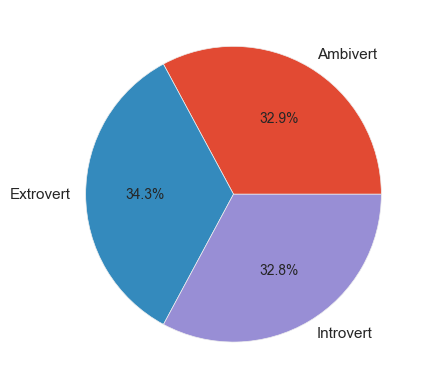

In [28]:
type=data.groupby('personality_type')['personality_type'].count().reset_index(name='count')
plt.pie(x=type['count'], labels=type['personality_type'],autopct='%1.1f%%')
plt.show()


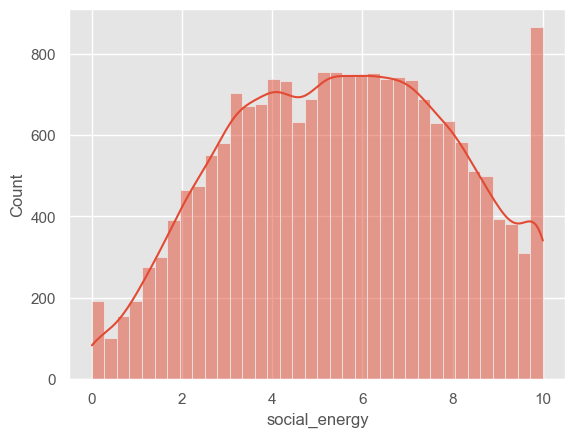

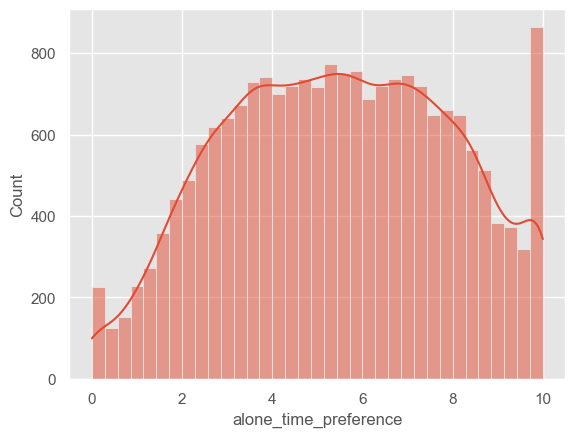

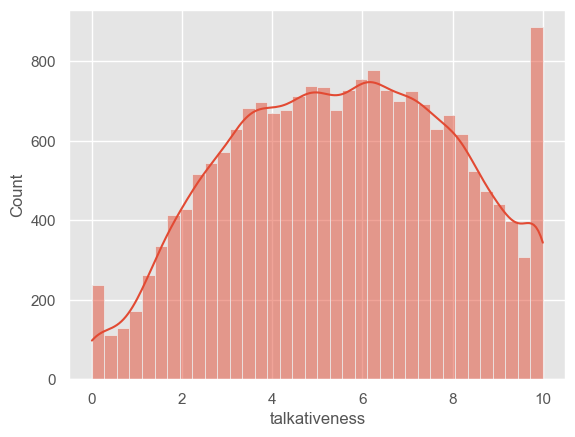

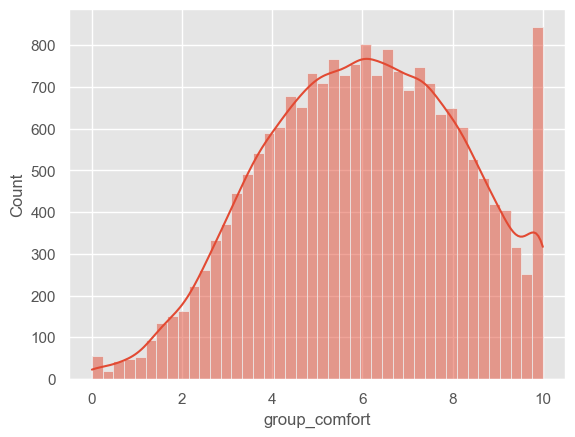

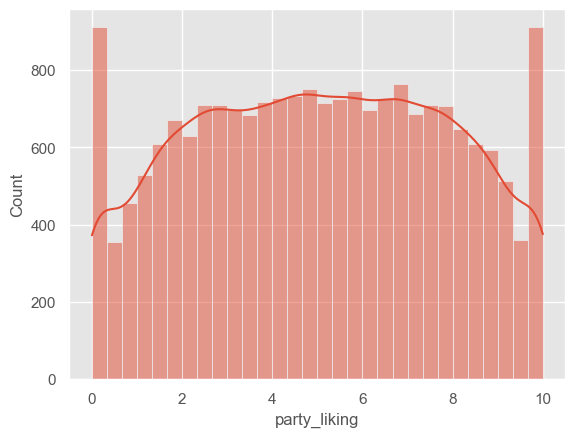

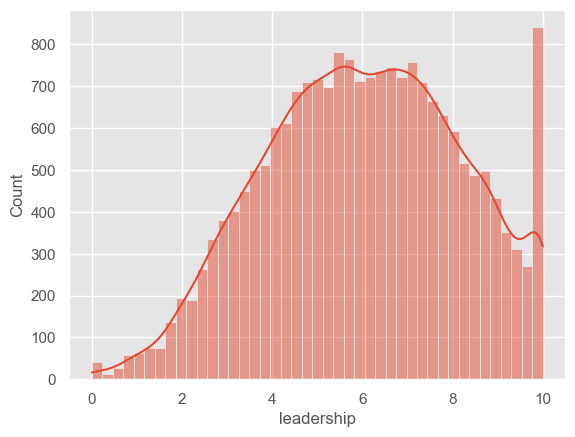

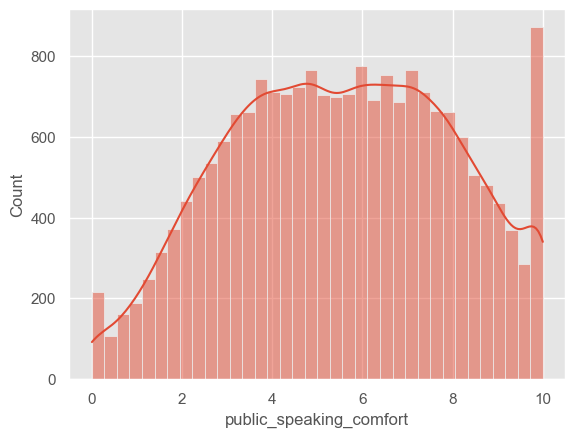

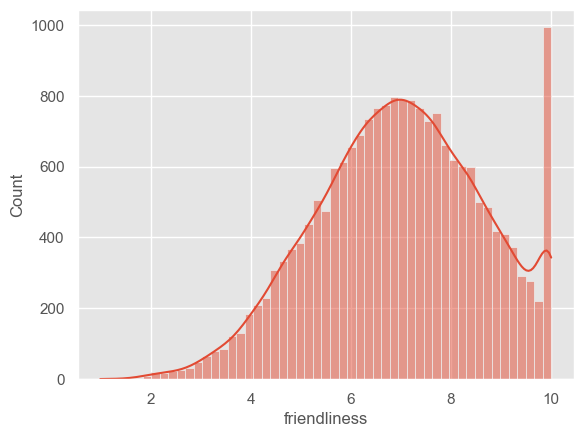

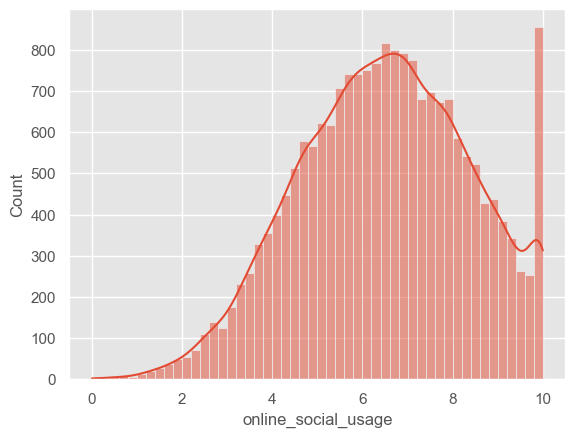

In [29]:
num_cols=data.select_dtypes(include='number')
for col in num_cols:
    sns.histplot(data=data,x=col,kde=True)
    plt.show()

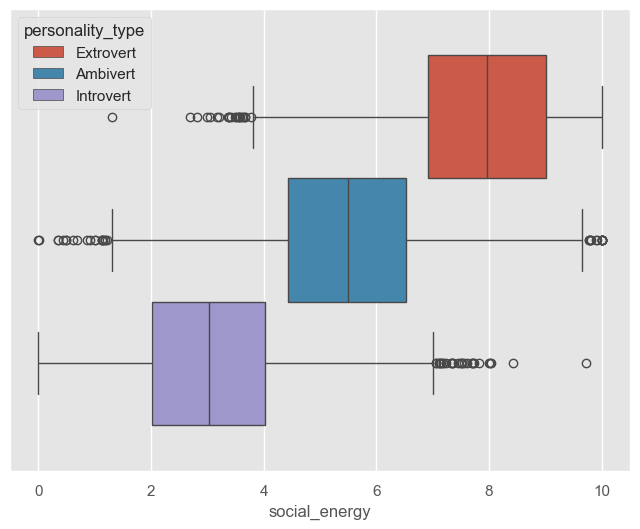

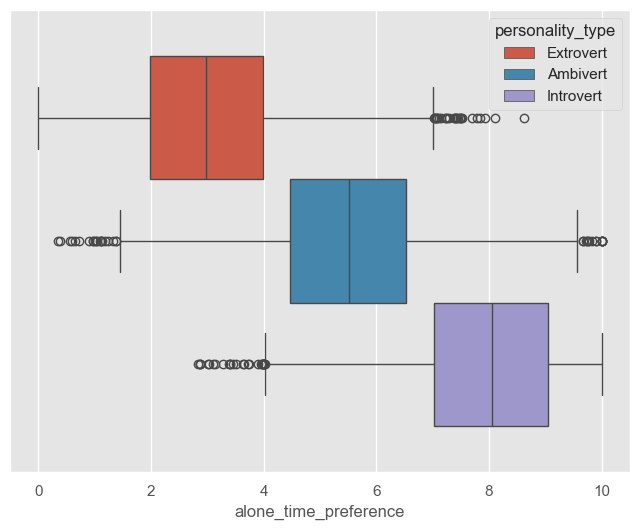

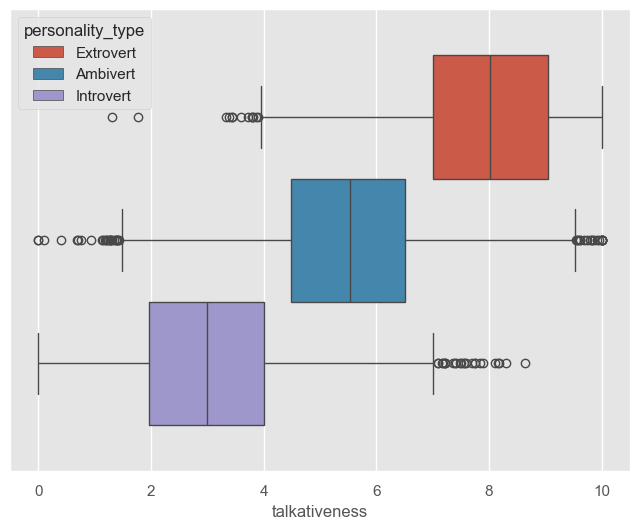

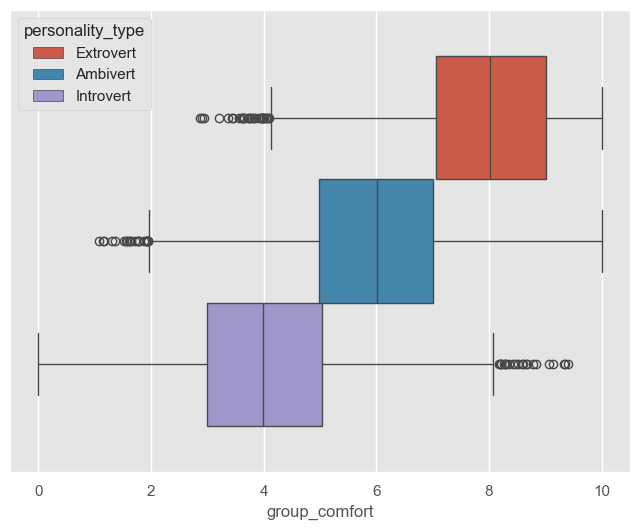

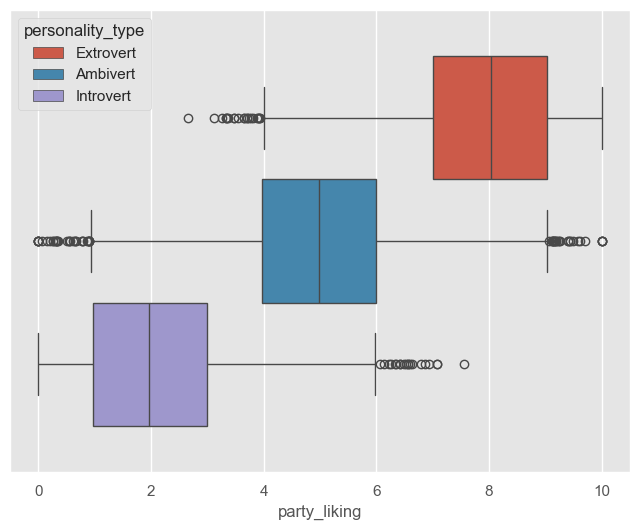

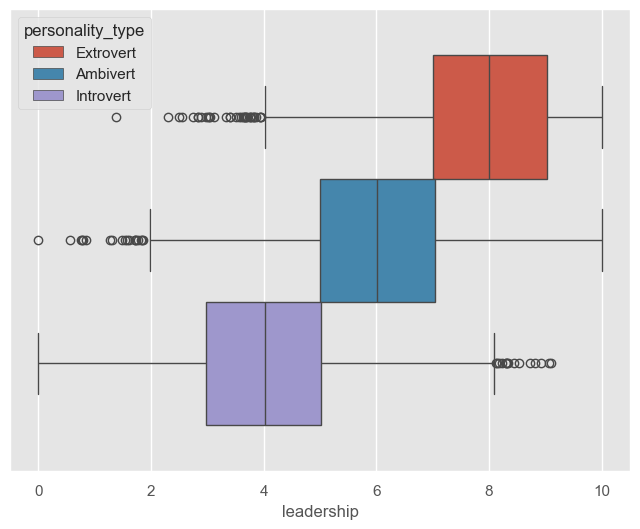

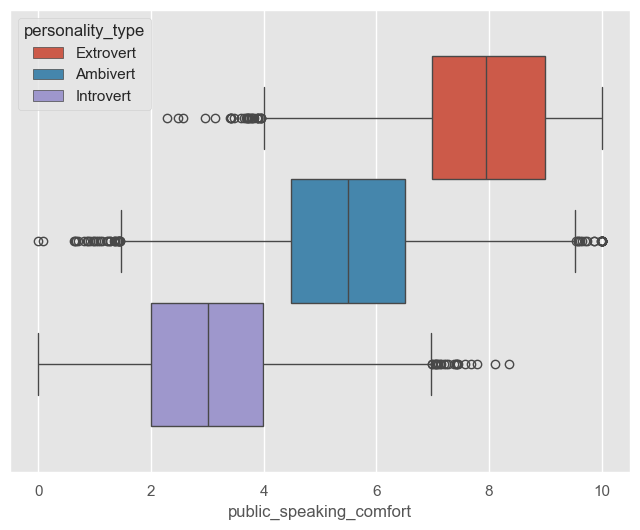

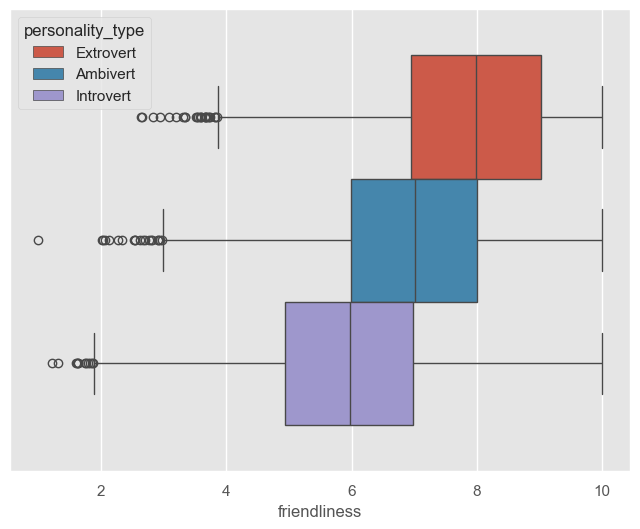

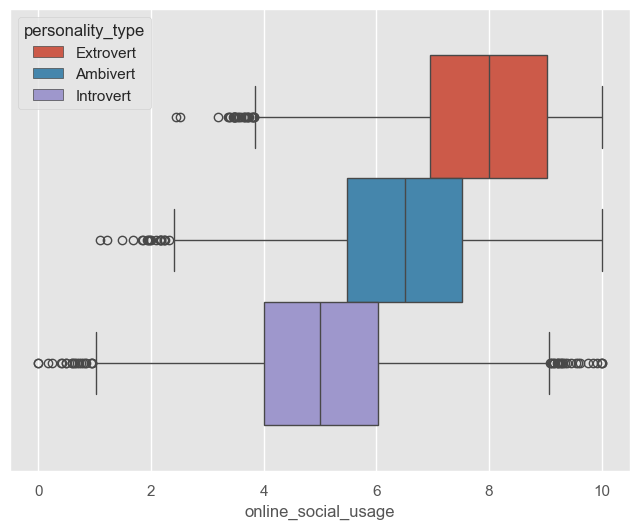

In [32]:
for col in num_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=data,x=col,hue='personality_type')
    plt.show()

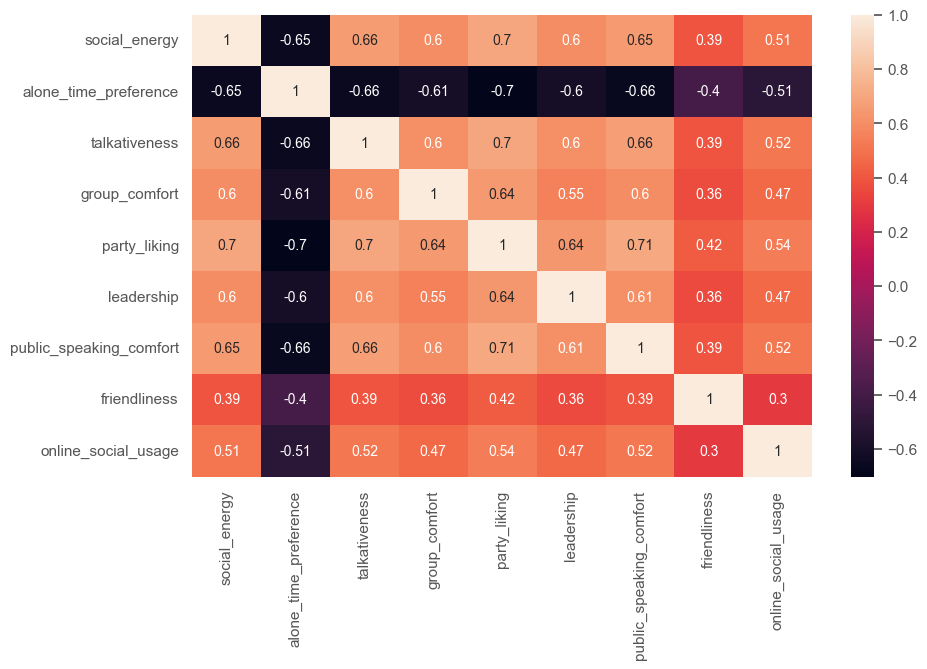

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(num_cols.corr(),annot=True)
plt.show()

In [41]:
data['personality_type'].unique()

array(['Extrovert', 'Ambivert', 'Introvert'], dtype=object)

In [42]:
data['personality_type'].replace({'Extrovert':0,'Ambivert':1,'Introvert':2},inplace=True)

C:\Users\dorot\AppData\Local\Temp\ipykernel_11928\1032935121.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['personality_type'].replace({'Extrovert':0,'Ambivert':1,'Introvert':2},inplace=True)
C:\Users\dorot\AppData\Local\Temp\ipykernel_11928\1032935121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['personality_type'].replace({'Extrovert':0,'Ambivert':1,'Introvert':2},inplace=True)


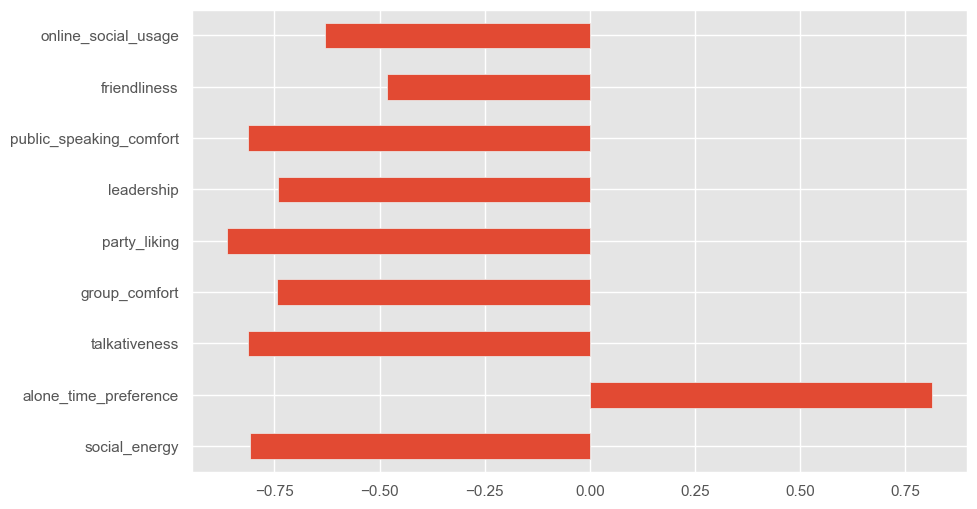

In [43]:
correlation_values = data.corr()['personality_type'].drop('personality_type')
correlation_values.plot(kind='barh', figsize=(10, 6))
plt.show()

In [65]:
X=data.drop('personality_type',axis=1)
y=data['personality_type']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Accuracy: 98.0
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1426
           1       0.97      0.96      0.97      1261
           2       0.98      0.99      0.98      1313

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000



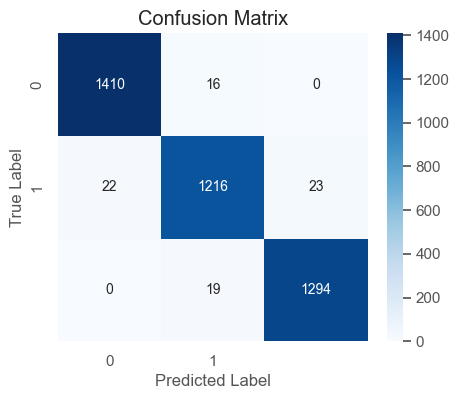

In [56]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, y_pred) * 100, 2))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [50]:
param_grid = [{
    'splitter':['best','random'],
    'max_depth':[2,4,8,12],
    'min_samples_split':[6,8,10,12],
    'criterion':['entropy','gini'],
    'class_weight': [{0: 1, 1: 2},{0: 1, 1: 3}]
}]

dtc=DecisionTreeClassifier()

grid_search=GridSearchCV(dtc,param_grid,cv=5,scoring='accuracy', n_jobs=-1)  
grid_search.fit(X_train, y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

0.9454375
{'class_weight': {0: 1, 1: 2}, 'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 6, 'splitter': 'best'}


In [67]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("scaler", scaler),
    ("classifier", DecisionTreeClassifier(class_weight= {0: 1, 1: 2}, criterion= 'entropy', max_depth= 12, min_samples_split= 6, splitter='best'))
])

Accuracy: 94.58
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1426
           1       0.91      0.92      0.91      1261
           2       0.96      0.96      0.96      1313

    accuracy                           0.95      4000
   macro avg       0.94      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000



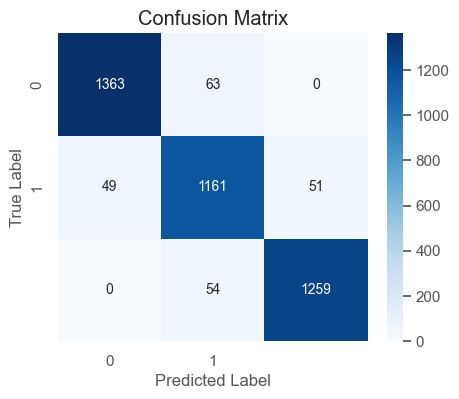

In [69]:
pipeline.fit(X_train,y_train)
y_pred=pipeline.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, y_pred) * 100, 2))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 94.73
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1426
           1       0.91      0.92      0.92      1261
           2       0.96      0.96      0.96      1313

    accuracy                           0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000



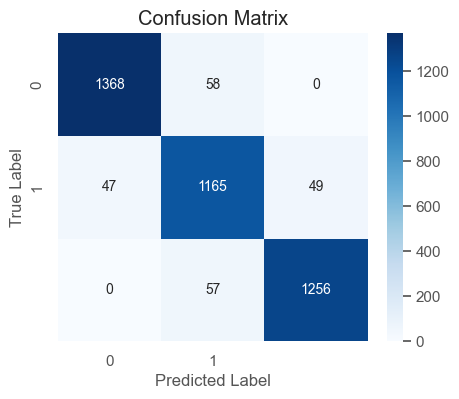

In [51]:
best_dtc = grid_search.best_estimator_
best_dtc.fit(X_train,y_train)
y_pred=best_dtc.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, y_pred) * 100, 2))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [54]:
class_dict={'Extrovert':0,'Ambivert':1,'Introvert':2}
class_dict

{'Extrovert': 0, 'Ambivert': 1, 'Introvert': 2}

In [70]:
best_clf=pipeline
y_pred=best_clf.predict(X_test)
y_pred

array([1, 0, 2, ..., 2, 1, 1], shape=(4000,))

In [71]:
#!pip install joblib
import joblib
joblib.dump(pipeline,'model.pkl')

['model.pkl']

In [61]:
import json
with open("class_dict.json","w") as f:
    f.write(json.dumps(class_dict))